0.5 0.8660254037844386 56


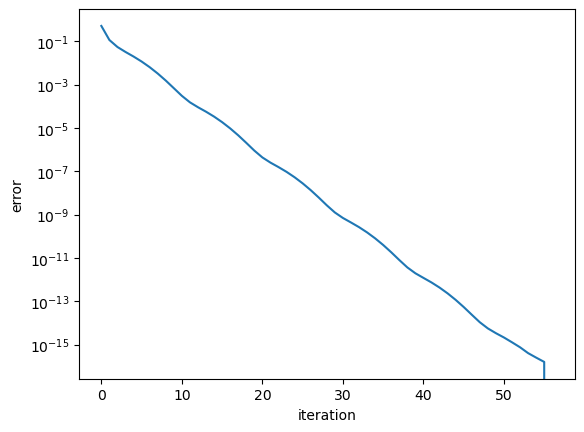

In [129]:
import numpy as np
from matplotlib import pyplot as plt

f = lambda xn: 3*xn[0]**2-xn[1]**2
g = lambda xn: 3*xn[0]*xn[1]**2 - xn[0]**3 - 1

X = np.array([1.0,1.0])
a = np.array([[1/6, 1/18],[0, 1/6]])
all_X = []
n = 0
while n<1000:
    all_X.append(X.copy())
    fn = f(X)
    gn = g(X)
    b = np.array([[fn],[gn]])
    nudge = (a @ b).T
    Xbefore = X.copy()
    X -= nudge[0]
    if np.linalg.norm(X - Xbefore) < 1e-16:
        break
    n += 1
print(X[0], X[1], n)
all_X = np.array(all_X)
error = np.linalg.norm(np.abs(all_X - X), axis=1)
plt.semilogy(error)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

0.5 0.8660254037844386 7


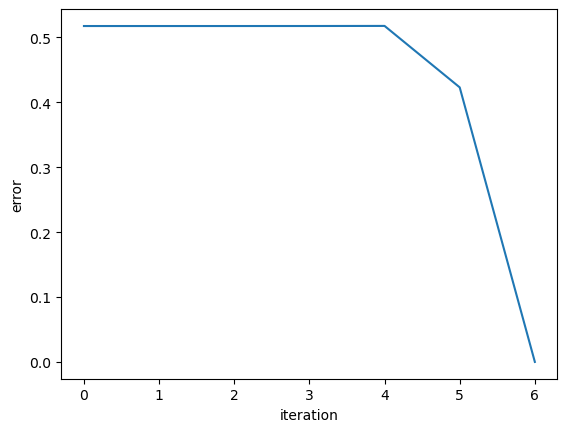

In [124]:
def newton_method_nd(f,Jf,x0,tol,nmax,verb=False):

    # Initialize arrays and function value
    xn = x0; #initial guess
    rn = x0; #list of iterates
    Fn = f(xn); #function value vector
    n=0;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:
        # compute n x n Jacobian matrix
        Jn = Jf(xn);
        nJ+=1;

        if verb:
            print("|--%d--|%1.7f|%1.12f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));

        # Newton step (we could check whether Jn is close to singular here)
        pn = -np.linalg.solve(Jn,Fn);
        xn = xn + pn;
        npn = np.linalg.norm(pn); #size of Newton step

        n+=1;
        rn = np.vstack((rn,xn));
        Fn = f(xn);
        nf+=1;

    r=xn;

    if verb:
        if np.linalg.norm(Fn)>tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);

f = lambda x: np.array([3*x[0]**2 - x[1]**2, 3*x[0]*x[1]**2-x[0]**3-1])
Jf = lambda x: np.array([[6*x[0], -2*x[1]], [3*x[1]**2-3*x[0]**2, 6*x[0]*x[1]]])

X = np.array([1.0,1.0])
r, rn, nj, _ = newton_method_nd(f, Jf, X, 1e-16, 1000)
print(r[0], r[1], nj)
all_X = np.array(rn)
error = np.linalg.norm(np.abs(all_X[::-1] - X), axis=1)
plt.plot(error)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

point is at [1.09364232 1.36032838 1.36032838]


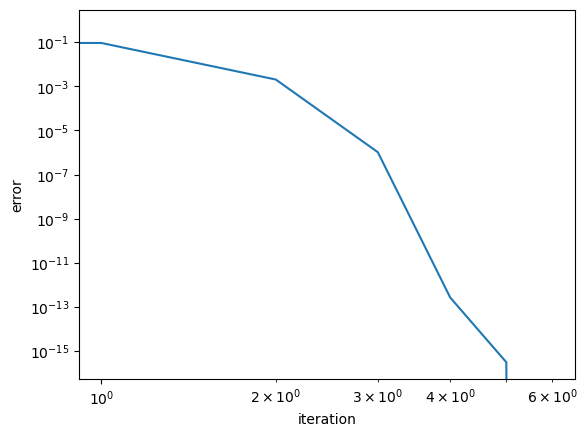

In [91]:
f = lambda X: X[0]**2 + 4*X[1]**2 + 4*X[2]**2 - 16
fx = lambda X: 2 * X[0]
fy = lambda X: 8 * X[1]
fz = lambda X: 8 * X[2]

X = np.array([1.0,1.0,1.0])
all_X = []
n = 0
while n<1000:
    all_X.append(X.copy())
    fxn = fx(X)
    fyn = fy(X)
    fzn = fz(X)
    d = f(X)/(fxn**2 + fyn**2 + fzn**2)
    nudge = np.array([d * fxn, d * fyn, d * fzn])
    Xbefore = X.copy()
    X -= nudge
    if np.linalg.norm(X - Xbefore) < 1e-16:
        break
    n += 1

print(f'point is at {X}')
all_X = np.array(all_X)
error = np.linalg.norm(np.abs(all_X - X), axis=1)
plt.loglog(error)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()